# Refinery Maintenances

This notebook will return an analysis of Refineries maintenances in various regions. Europe, ME, North America, Asia-Pacific, and FSU.

When it dives into unit maintenance detail considers only the following units: CDU, FCC, HCU, and Coker. EA also provides data into RFMR (?), Alkilation, HT, and Others.

In [1]:
import read_API
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import graph_functions as gf

In [2]:
# type your api key here
api_key = "aed5e4a5-141c-4f34-84cb-b3d991fc0ba5"

## Europe

In [3]:
# The following dataset ids are needed to get European information on Refinery Maintenances
total_estimated_impact = 7022
unplanned_outages_forecast = 581144
fcc = 6864
hcu = 7041
cok = 7042
cdu = 7094

region = 'Europe'

ids = [total_estimated_impact,cdu,fcc,hcu,cok,unplanned_outages_forecast]

In [4]:
# this will get all the data in a wide format with descriptions as column names
df = read_API.get_data(ids, api_key)

# reorder the columns since the API does not deliver by the ids order
def desired_order(df):
    desired_order = ['Date',
                     f'Monthly refinery total estimated impact in {region} in kb/d',
                     f'Monthly EA forecast for refinery unplanned outages in {region} in kb/d',
                     f'Monthly refinery total outages for CDU units in {region} in kb/d',
                     f'Monthly refinery total outages for FCC units in {region} in kb/d',
                     f'Monthly refinery total outages for HCU units in {region} in kb/d',
                     f'Monthly refinery total outages for COK units in {region} in kb/d']
    df = df[[col for col in desired_order if col in df.columns]]

    return df


df = desired_order(df)

### Maintenances Seasonal Graph

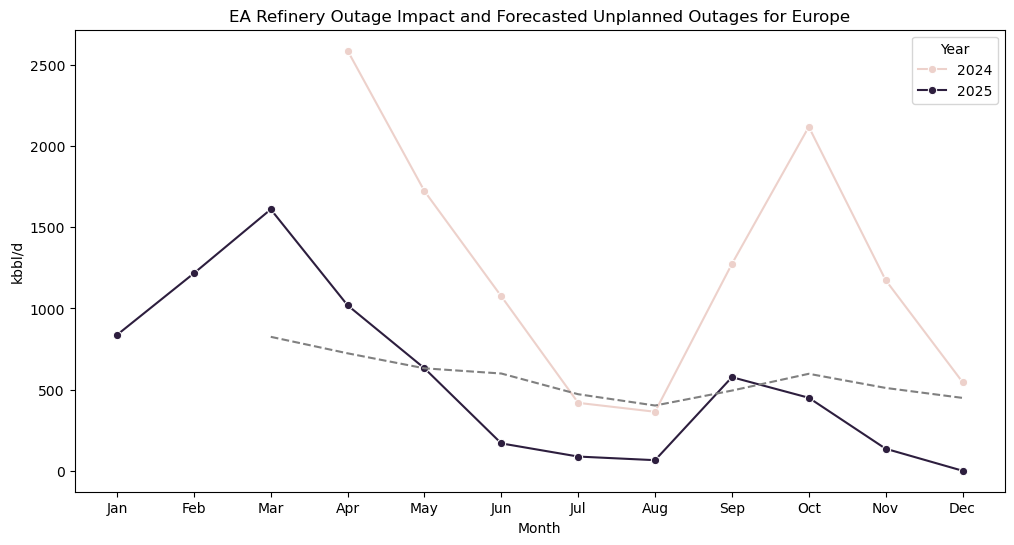

In [5]:
gf.seasonal_maintenances(df, region)

### Outages by Unit

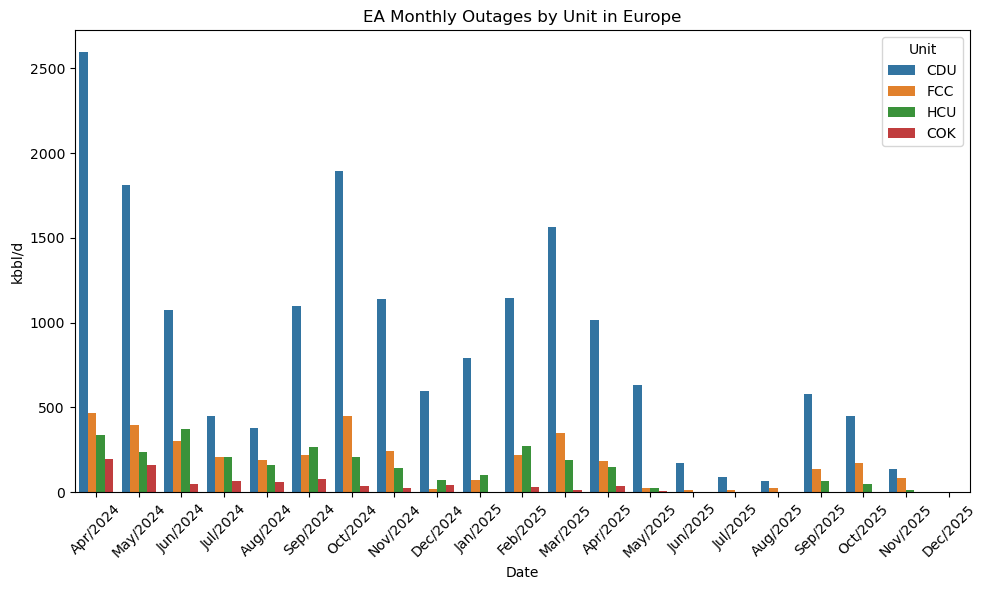

In [7]:
gf.unit_maintenances(df, region)

## Asia-Pacific

In [10]:
# The following dataset ids are needed to get Asian-Pacific information on Refinery Maintenances
total_estimated_impact = 7010
unplanned_outages_forecast = 581190
fcc = 7000
hcu = 6834
cok = 6988
cdu = 6962

region = "Asia Pacific"

ids = [total_estimated_impact,cdu,fcc,hcu,cok,unplanned_outages_forecast]

In [11]:
# this will get all the data in a wide format with descriptions as column names
df = read_API.get_data(ids, api_key)

df = desired_order(df)

,Date,Monthly refinery total estimated impact in Asia Pacific in kb/d,Monthly EA forecast for refinery unplanned outages in Asia Pacific in kb/d,Monthly refinery total outages for CDU units in Asia Pacific in kb/d,Monthly refinery total outages for FCC units in Asia Pacific in kb/d,Monthly refinery total outages for HCU units in Asia Pacific in kb/d,Monthly refinery total outages for COK units in Asia Pacific in kb/d
0,2024-04-01,3449.520000,NaN,3406.320000,333.773333,337.166667,212.400000
1,2024-05-01,3408.929032,NaN,3282.606452,618.735484,408.548387,298.794839
2,2024-06-01,3324.593333,NaN,3155.133333,510.466667,352.033333,315.360000
3,2024-07-01,2585.801613,NaN,2554.096774,338.064516,260.806452,261.270968
4,2024-08-01,2240.978548,NaN,2464.564516,354.000000,193.225806,227.032258


### Maintenances Seasonal Graph

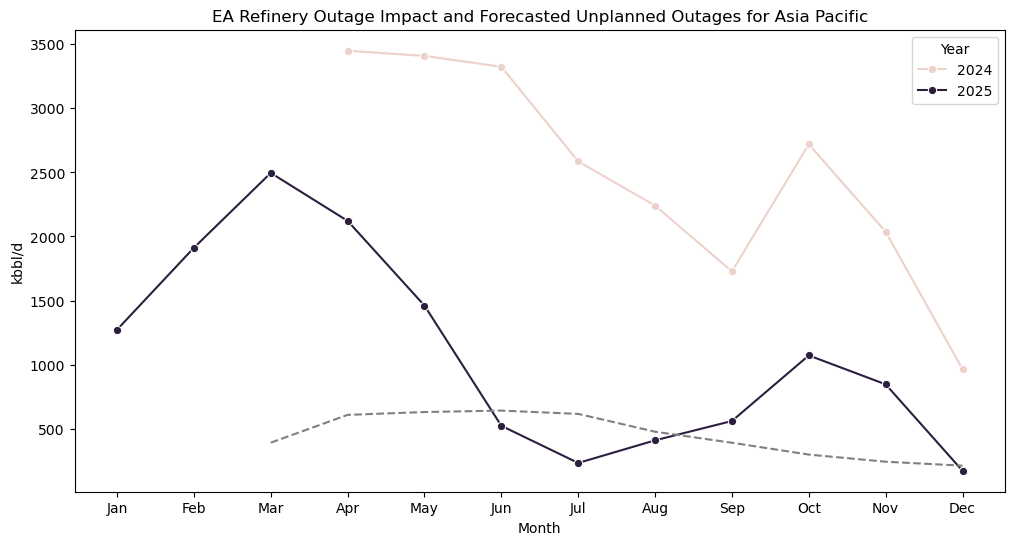

In [12]:
gf.seasonal_maintenances(df, region)

### Outages by Unit

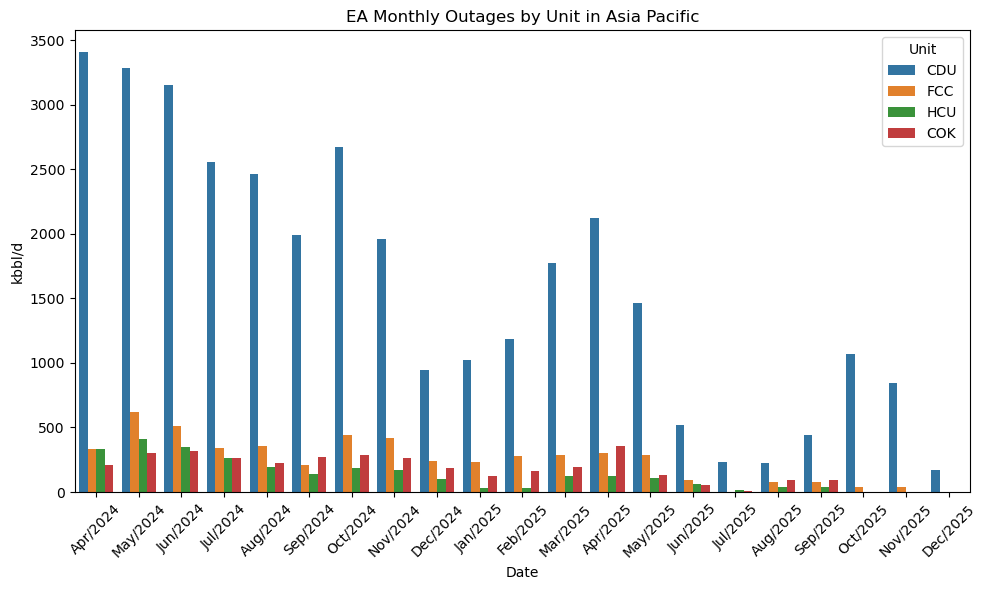

In [13]:
gf.unit_maintenances(df, region)

# North America

In [14]:
# The following dataset ids are needed to get Asian-Pacific information on Refinery Maintenances
total_estimated_impact = 6912
unplanned_outages_forecast = 581127
fcc = 6922
hcu = 6955
cok = 6876
cdu = 6806

region = "North America"

ids = [total_estimated_impact,cdu,fcc,hcu,cok,unplanned_outages_forecast]

In [15]:
# this will get all the data in a wide format with descriptions as column names
df = read_API.get_data(ids, api_key)

df = desired_order(df)

### Maintenances Seasonal Graph

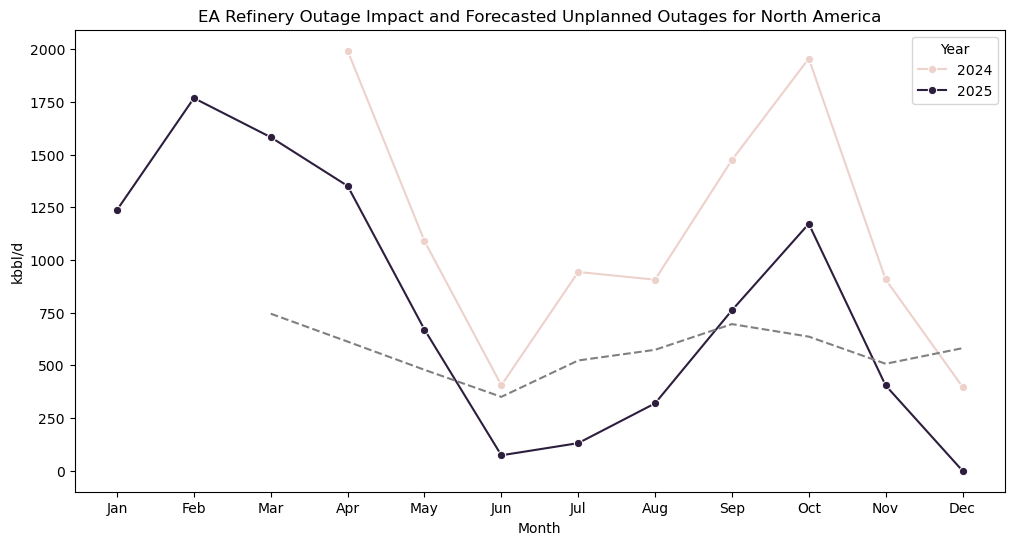

In [16]:
gf.seasonal_maintenances(df, region)

### Outages by Unit

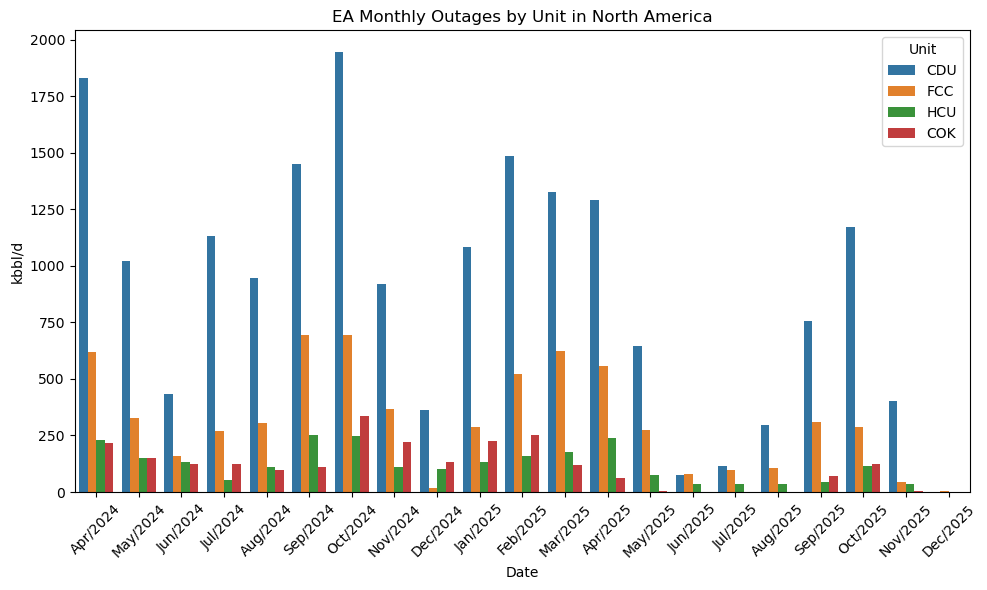

In [17]:
gf.unit_maintenances(df, region)

# Middle East

In [18]:
# The following dataset ids are needed to get Asian-Pacific information on Refinery Maintenances
total_estimated_impact = 7102
unplanned_outages_forecast = 581181
fcc = 7129
hcu = 7071
cok = 6956
cdu = 7031

region = "Middle East"

ids = [total_estimated_impact,cdu,fcc,hcu,cok,unplanned_outages_forecast]

In [19]:
# this will get all the data in a wide format with descriptions as column names
df = read_API.get_data(ids, api_key)

df = desired_order(df)

### Maintenances Seasonal Graph

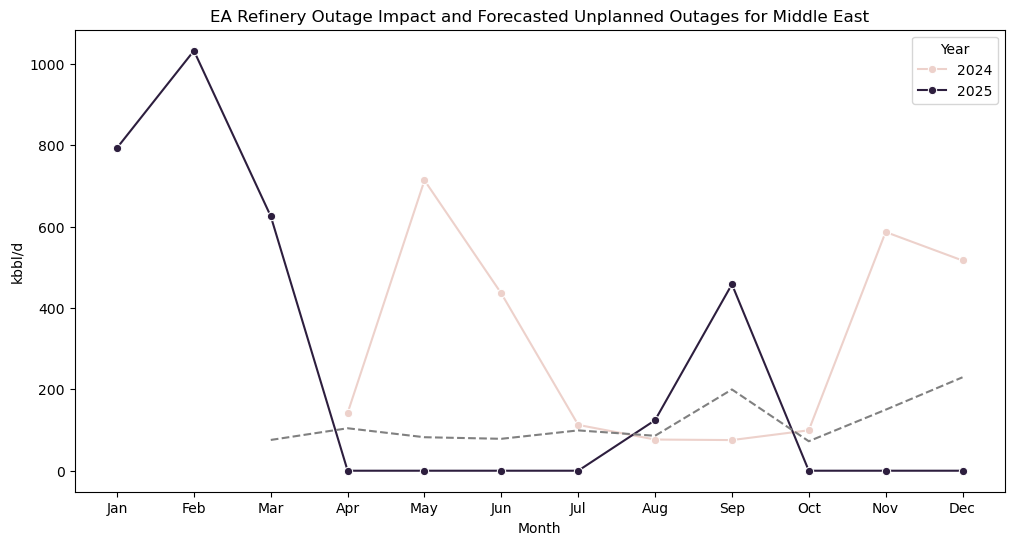

In [20]:
gf.seasonal_maintenances(df, region)

### Outages by Unit

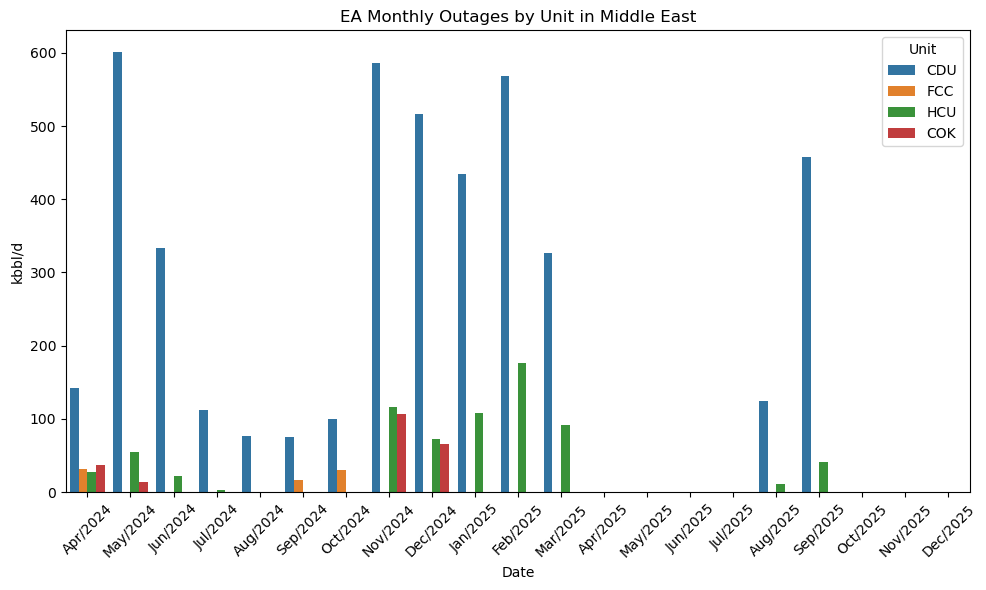

In [21]:
gf.unit_maintenances(df, region)

# Global Maintenances

In [23]:
# The following dataset ids are needed to get Asian-Pacific information on Refinery Maintenances
ids = [6810,6912,6914,6957,7010,7022,7102]

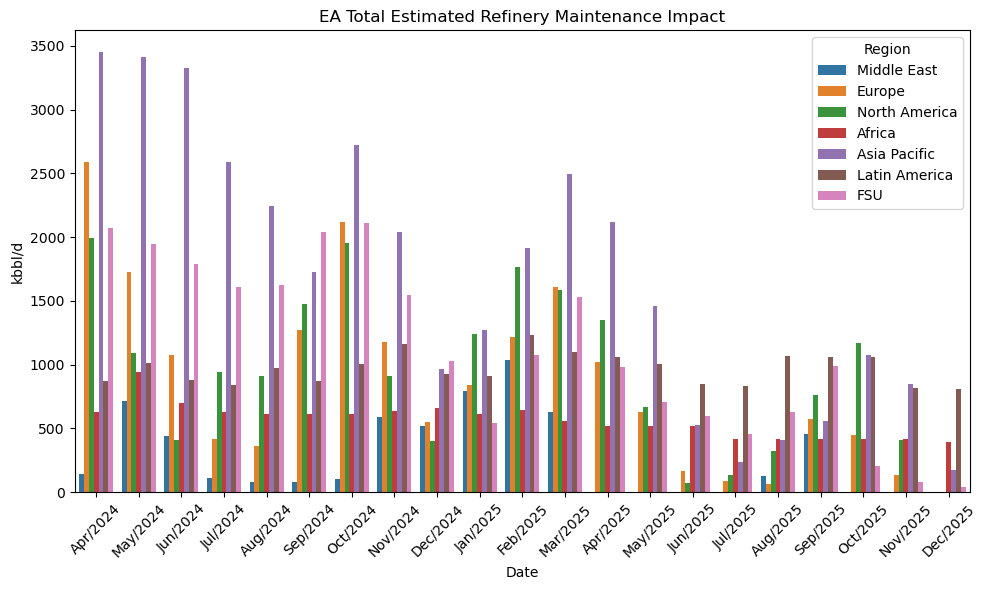

In [32]:
# this will get all the data in a wide format with descriptions as column names
df = read_API.get_data(ids, api_key)

df = df.rename(columns={'Monthly refinery total estimated impact in Europe in kb/d': 'Europe',
                        'Monthly refinery total estimated impact in North America in kb/d': 'North America',
                        'Monthly refinery total estimated impact in Africa in kb/d': 'Africa',
                        'Monthly refinery total estimated impact in Middle East in kb/d': 'Middle East',
                        'Monthly refinery total estimated impact in Asia Pacific in kb/d': 'Asia Pacific',
                        'Monthly refinery total estimated impact in Latin America in kb/d': 'Latin America',
                        'Monthly refinery total estimated impact in Former Soviet Union in kb/d': 'FSU'})


# Melt the dataframe for seaborn
df_melted = df.melt(id_vars='Date', var_name='Category', value_name='Absolute Value')

# Create a stacked graph
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Date', y='Absolute Value', hue='Category')
plt.title('EA Total Estimated Refinery Maintenance Impact')
plt.xlabel('Date')
plt.ylabel('kbbl/d')
plt.legend(title='Region')
ticks = df_melted['Date'].unique()
labels = [d.strftime('%b/%Y') for d in ticks]
plt.xticks(ticks=range(len(ticks)), labels=labels, rotation=45)
plt.tight_layout()
plt.show()
